# Сборный проект

В этом проекте нам предстоит, проанализировать данные интернет игр "Стримчик". Для этого у нас есть датафрейм с информацией о:

  + Названии игр
  + Патформы
  + Года выпуска
  + Рейтинга (пользователей и критиков)
  + Жанра
  + Данных о проадажах в 4 регионах (Северная Америка, Европа, Япония, Прочее)
  + Рейтинга присвоенной ESRB
  
Цель исследования:

1. Проанализировать полученный данные
2. Составить портрет пользователя для каждого рынка сбыта, что может влиять на продажи в том или инном регионе 
3. Провести статистический анализ данных, для лучшего понимания какие игровые платформы больше нравятся пользователям, и игры какого жанра для пользователей предпочтительнее
  
  Ход исследования
  
  Данные мы получим из файла:
  
   + Пользователи -  '/datasets/games.csv'
   
   На первом этапе я проверю данные на наличие ошибок, если они есть, то проведу преобработку данных, а затем начну исследовательский анализ и проверку гипотез. 
   
   Этапы исследования:
   
   + Загрузка данных
   + Предобработка данных
   + Исследовательский анализ данных
   + Исследовательский анализ данных в разрезе региона
   + Проверка гипотез

# Шаг 1. Загрузка данных

In [51]:
# загрузка библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from scipy.stats import norm

In [52]:
# загрузка датафрейма

data = pd.read_csv("C:\\Users\\A.Urazimbetov\\Downloads\\games.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



# Загрузка датафрейма
    
При загрузке данных, мы получили датафрейм с 16715 строками и 10 колонками, так же можно заметить что не все игры имеют полную информацию, строки с Year_of_Release, Critic_Score, User_Score, Rating имеют пропуски в значениях, так же не названия колонок, не соответсвуют змеиному регистру




# Шаг 2. Предобработка данных


In [54]:
# переименование столбцов, привели название столбцов к нужному регистру

data.rename(columns = {'Name' : 'name', 'Platform':'platform', 
                       'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales': 'na_sales', 
                       'EU_sales': 'eu_sales','JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 
                       'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}
            , inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [55]:
# приведение year_of_release к типу int и замена пропусков по медиане

data = data[data['year_of_release'].notna()]
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [56]:
# приведение к нужному типу по колонке user_score

data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)

In [57]:
# поставил заглушку

data['rating'].fillna('unknown', inplace =True)

In [58]:
# проверка на дубликаты

data.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [59]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [60]:
# у нас два пропуска по названию игры лучше будет избавится от этого

data = data[data['name'].notna()]

In [61]:
# добавление колонки общей суммы продаж

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [62]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB



В данном шаге, мы провели предобработку данных:
    
1. привели к нужному регистру названия наших столбцов
2. Заменили на медиану пропуски в столбце year_of_release, можно было бы и не делать, но так как это небольшая часть данных я рискнул сделать так
3. Пропуски в столбце оценки критиков заменил на медианное значение этой же игры, так как выяснилось что есть случаи когда у нас есть оценки игры на одной платформе но нет на другой 
4. Вот пропуски и значение tbd (to be decided или to be determined) что значит будет определено, я сначала сделал их  пустыми, затем как в методе выше заменил их на медианное значений 
5. Так же была добавлена колонка общих продаж игры и эта сумма равна 8 913 290 000

    
До обработки данных у нас размер нашей таблицы был - 11 колонок и 16715 строк, после 12 колонок и 16713 строк, были удалены игры которые не имели названия, так же можно заметить будто мы потеряли данные в user_score, но это были убраны или же заменены значения tbd (колонка имела формат string), нам бы эти значения не дади бы большой информации 

# Шаг 3. Исследовательский анализ данных

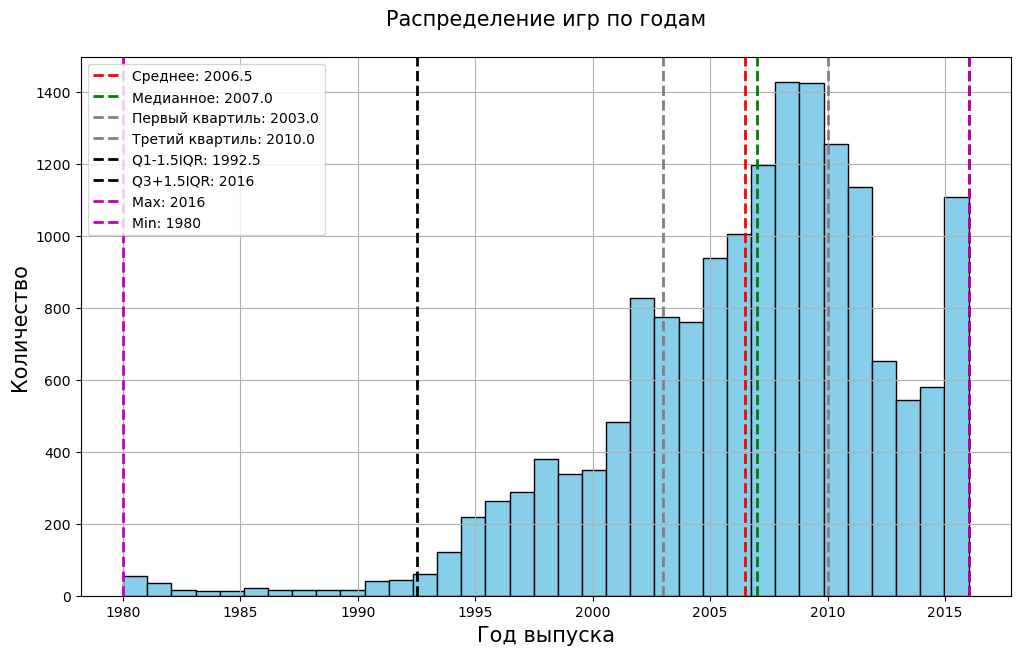

In [63]:
# распределение выпуска игр по году

data['year_of_release'].hist(bins = 35, figsize = (12, 7), color='skyblue', edgecolor='black')
plt.xlabel('Год выпуска', fontsize = 15)
plt.ylabel('Количество', fontsize = 15)
plt.title('Распределение игр по годам\n', fontsize = 15)
yor_mean = data['year_of_release'].mean()
yor_median = np.percentile(data['year_of_release'], 50)
yor_q1 = np.percentile(data['year_of_release'], 25)
yor_q3 = np.percentile(data['year_of_release'], 75)
yor_iqr_1 = yor_q1 - 1.5*(yor_q3 - yor_q1)
yor_iqr_2 = yor_q3 + 1.5*(yor_q3 - yor_q1)
yor_max = data['year_of_release'].max()
yor_min = data['year_of_release'].min()
if yor_iqr_1 < yor_min:
    yor_iqr_1 = yor_min
if yor_iqr_2 > yor_max:
    yor_iqr_2 = yor_max
plt.axvline(yor_mean, color='red', linestyle='dashed', 
            linewidth=2, label=f'Среднее: {round(yor_mean, 1)}')
plt.axvline(yor_median, color='green', linestyle='dashed',
            linewidth=2, label=f'Медианное: {round(yor_median, 1)}')
plt.axvline(yor_q1, color='grey', linestyle='dashed',
            linewidth=2, label=f'Первый квартиль: {round(yor_q1, 1)}')
plt.axvline(yor_q3, color='grey', linestyle='dashed',
            linewidth=2, label=f'Третий квартиль: {round(yor_q3, 1)}')
plt.axvline(yor_iqr_1, color='black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5IQR: {round(yor_iqr_1, 1)}')
plt.axvline(yor_iqr_2, color='black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5IQR: {round(yor_iqr_2, 1)}')
plt.axvline(yor_max, color='m', linestyle='dashed',
            linewidth=2, label=f'Max: {round(yor_max, 1)}')
plt.axvline(yor_min, color='m', linestyle='dashed',
            linewidth=2, label=f'Min: {round(yor_min, 1)}')
plt.legend()
plt.grid(True)
plt.show()



Как можно заметить в распределении игр по годам, очень стремительный рост наблюдается с 1991 - 2009, возможно это золотая эпоха видеоигр, после все идет на спад, кроме скачка в 2016 году, что для меня пока не понятно, так же на графике показаны все значения если бы это был боксплот   



In [ ]:
platform = data.groupby('platform')['name'].count().sort_values(ascending = False)
platform.plot(kind = 'bar', figsize = (15, 10), color='skyblue', edgecolor='black', width=1)
plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Количество игр', fontsize = 15)
plt.title('Распределение игр по платформам\n', fontsize = 15)

IQR3 = int(np.percentile(platform, 75)) + 1.5*(int(np.percentile(platform, 75)) - int(np.percentile(platform, 25)))
if IQR3 > platform.max():
    IQR3 = platform.max()
IQR1 = int(np.percentile(platform, 25)) - 1.5*(int(np.percentile(platform, 75)) - int(np.percentile(platform, 25)))
if IQR1 < platform.min():
    IQR1 = platform.min()

plt.axhline(int(platform.median()), color='m', linestyle='dashed',
            linewidth=2, label=f'Median: {int(platform.median())}')
plt.axhline(int(np.percentile(platform, 25)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q1: {int(np.percentile(platform, 25))}')
plt.axhline(int(np.percentile(platform, 75)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q3: {int(np.percentile(platform, 75))}')
plt.axhline(IQR3, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5*IQR: {IQR3}')
plt.axhline(IQR1, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5*IQR: {IQR1}')
plt.axhline(platform.max(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Max: {platform.max()}')
plt.axhline(platform.min(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Min: {platform.min()}')


# эту часть кода с циклом мне чат гпт помог, не нашел в документации как сделать так
for i, num_games in enumerate(platform):
    plt.text(i, num_games + 10, str(num_games), ha='center', va='bottom')

plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

 

Как можно заметить, что в наших данных есть очень большая разница по количеству игр по платформам, например такие платформы как: SCD, WS, 3DO, TG16, PCFX, GG, имеют от 1 до 6 игр, где максимальное количество 2161 у консоли 2- го поколения Сони Плэйстейшн.




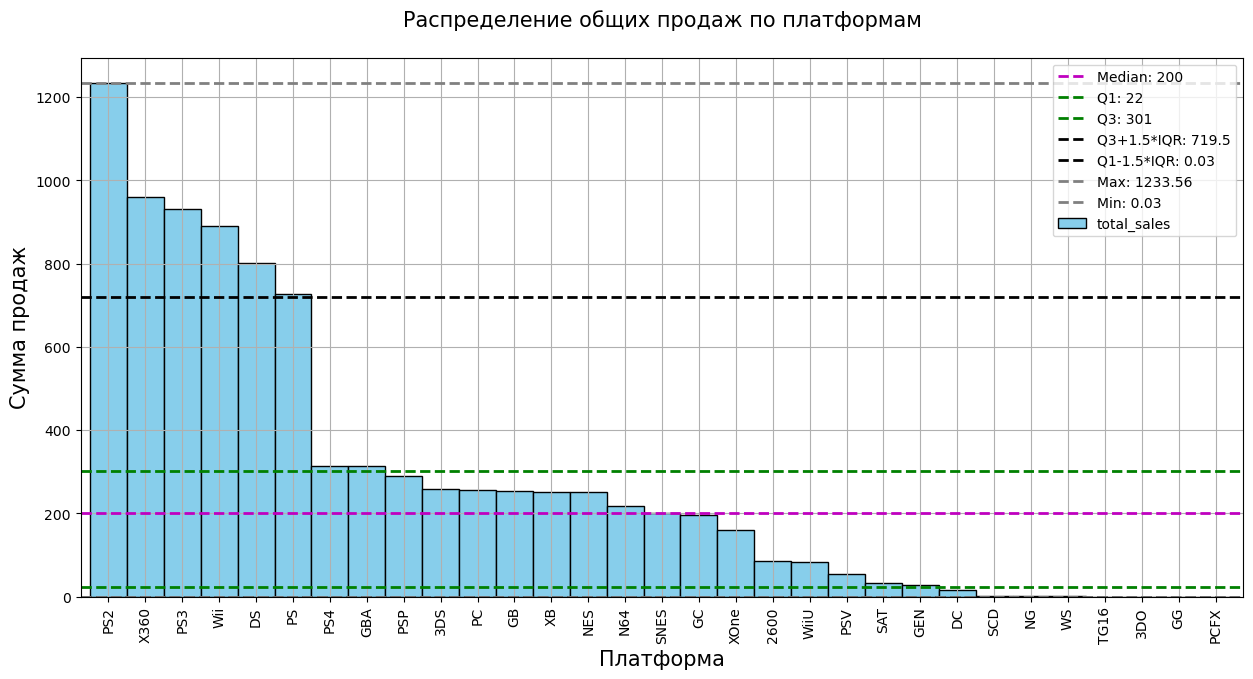

In [64]:
# распределение суммы продаж по платформам

platform_by_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending = False)
platform_by_sales.plot(kind = 'bar', figsize = (15, 7), color='skyblue', edgecolor='black', width=1)
plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Сумма продаж', fontsize = 15)
plt.title('Распределение общих продаж по платформам\n', fontsize = 15)

IQR3 = int(np.percentile(platform_by_sales, 75)) + 1.5*(int(np.percentile(platform_by_sales, 75)) - 
                                                        int(np.percentile(platform_by_sales, 25)))
if IQR3 > platform_by_sales.max():
    IQR3 = platform_by_sales.max()
IQR1 = int(np.percentile(platform_by_sales, 25)) - 1.5*(int(np.percentile(platform_by_sales, 75)) - 
                                                        int(np.percentile(platform_by_sales, 25)))
if IQR1 < platform_by_sales.min():
    IQR1 = platform_by_sales.min()

plt.axhline(int(platform_by_sales.median()), color='m', linestyle='dashed',
            linewidth=2, label=f'Median: {int(platform_by_sales.median())}')
plt.axhline(int(np.percentile(platform_by_sales, 25)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q1: {int(np.percentile(platform_by_sales, 25))}')
plt.axhline(int(np.percentile(platform_by_sales, 75)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q3: {int(np.percentile(platform_by_sales, 75))}')
plt.axhline(IQR3, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5*IQR: {IQR3}')
plt.axhline(IQR1, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5*IQR: {IQR1}')
plt.axhline(platform_by_sales.max(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Max: {round(platform_by_sales.max(), 2)}')
plt.axhline(platform_by_sales.min(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Min: {round(platform_by_sales.min(), 2)}')

plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()



На данном графике на оси Y, у нас показатель продаж в млн, как можно заметить, этот график не совсем совпадает с графиком выше, я про то что больше по количеству не всегда больше по сумме, скорее всего, если брать по количеству, то в лидерах будут платформы которые будут выпускать миниигры, или на портативные консоли. Но все таки как и на графике выше лидирующее место занимает PS2 c показателям по продажам 1 255 770 000, так же очень большая разница после PS, разница приммерно в 550 000 000
   




In [ ]:
# распределение платформ по годам

platform_by_year = data.pivot_table(index = 'platform', values  = 'year_of_release', aggfunc = ['min', 'max'])
platform_by_year.columns = ['year_min', 'year_max']
platform_by_year['release_years'] = platform_by_year['year_max'] - platform_by_year['year_min']
platform_by_years = platform_by_year['release_years'].sort_values(ascending = False)
platform_by_years
platform_by_years.plot(kind = 'bar', figsize = (15, 7), color='skyblue', edgecolor='black', width = 1)

IQR3 = int(np.percentile(platform_by_year['release_years'], 75)) + 1.5*(int(np.percentile(platform_by_year['release_years'], 75)) - 
                                                        int(np.percentile(platform_by_year['release_years'], 25)))
if IQR3 > platform_by_year['release_years'].max():
    IQR3 = platform_by_year['release_years'].max()
IQR1 = int(np.percentile(platform_by_year['release_years'], 25)) - 1.5*(int(np.percentile(platform_by_year['release_years'], 75)) - 
                                                        int(np.percentile(platform_by_year['release_years'], 25)))
if IQR1 < platform_by_year['release_years'].min():
    IQR1 = platform_by_year['release_years'].min()
    
    
years_median = platform_by_year['release_years'].median()
Q1 = np.percentile(platform_by_year['release_years'], 25)
Q3 = np.percentile(platform_by_year['release_years'], 75)
years_max = platform_by_year['release_years'].max()
years_min = platform_by_year['release_years'].min()

plt.axhline(years_median, color='m', linestyle='dashed',
            linewidth=2, label=f'Median: {years_median}')
plt.axhline(Q1, color='g', linestyle='dashed',linewidth=2, label=f'Q1: {Q1}')
plt.axhline(Q3, color='g', linestyle='dashed',
            linewidth=2, label=f'Q3: {Q3}')
plt.axhline(IQR3, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5*IQR: {IQR3}')
plt.axhline(IQR1, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5*IQR: {IQR1}')
plt.axhline(years_max, color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Max: {years_max}')
plt.axhline(years_min, color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Min: {years_min}')

plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Количество лет', fontsize = 15)
plt.title('Распределение выпуска игр по времени выпуска игр на них\n', fontsize = 15)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()



Данный график нам показывает срок жизни каждой платформы, сколько лет на нее выпускали игры, можно выделить что в среднем на одну консоль приходится примерно 9 лет, т. е. выходит новая платформа, на нее этот срок выпускают игры пока не выйдет новая консоль, но так же ожидаемо что ПК имеет самый максимальный показатель
   



In [65]:
# выделение актуального периода

data_actual = data[data['year_of_release'] >= 2013]

In [66]:
# какие платформы лидируют, по продажам

platform_list = data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending = False)

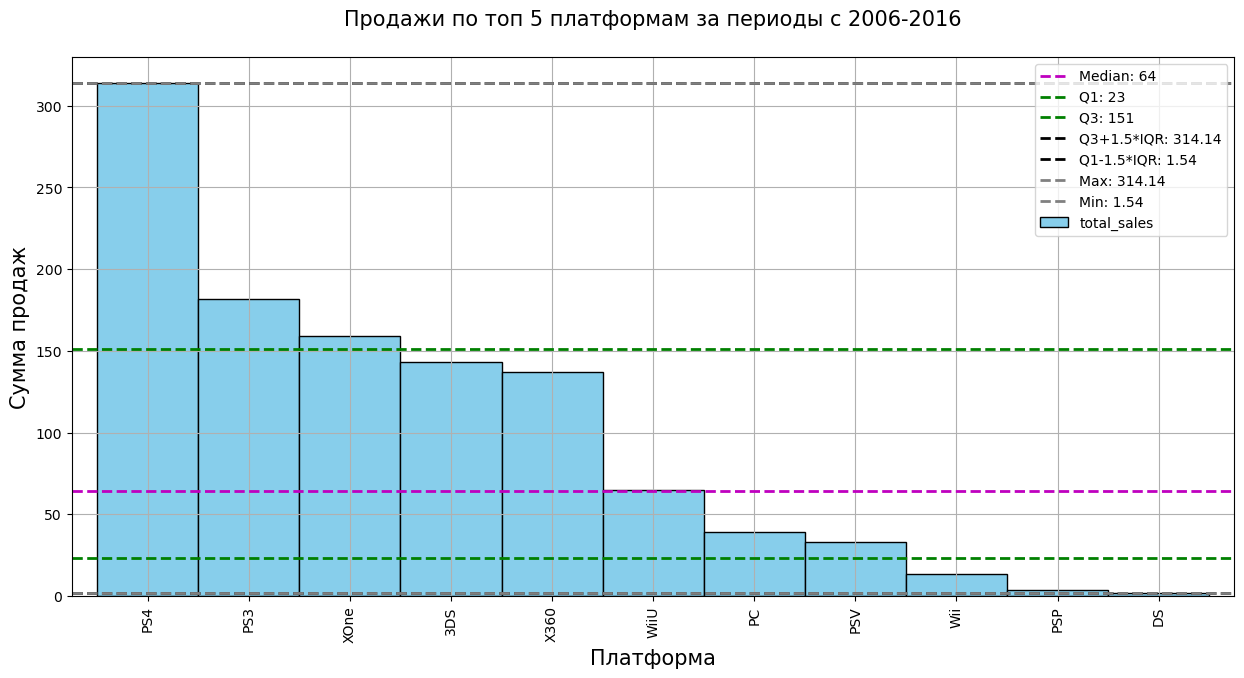

In [67]:
platform_list.plot(kind = 'bar', figsize = (15, 7), color='skyblue', edgecolor='black', width = 1)
plt.title('Продажи по топ 5 платформам за периоды с 2006-2016\n', fontsize = 15)


IQR3 = int(np.percentile(platform_list, 75)) + 1.5*(int(np.percentile(platform_list, 75)) - int(np.percentile(platform_list, 25)))
if IQR3 > platform_list.max():
    IQR3 = platform_list.max()
IQR1 = int(np.percentile(platform_list, 25)) - 1.5*(int(np.percentile(platform_list, 75)) - int(np.percentile(platform_list, 25)))
if IQR1 < platform_list.min():
    IQR1 = platform_list.min()

plt.axhline(int(platform_list.median()), color='m', linestyle='dashed',
            linewidth=2, label=f'Median: {int(platform_list.median())}')
plt.axhline(int(np.percentile(platform_list, 25)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q1: {int(np.percentile(platform_list, 25))}')
plt.axhline(int(np.percentile(platform_list, 75)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q3: {int(np.percentile(platform_list, 75))}')
plt.axhline(IQR3, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5*IQR: {round(IQR3, 2)}')
plt.axhline(IQR1, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5*IQR: {IQR1}')
plt.axhline(platform_list.max(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Max: {round(platform_list.max(), 2)}')
plt.axhline(platform_list.min(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Min: {round(platform_list.min(), 2)}')

plt.xlabel('Платформа', fontsize = 15)
plt.ylabel('Сумма продаж', fontsize = 15)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()


platform_list = platform_list.reset_index()

# составляем датафрейм для топ платформ по продажам

sum_sales = platform_list['total_sales'].sum()
platform_list['%'] = round(platform_list['total_sales']/sum_sales*100, 2)
platform_list['cumulate%'] = platform_list['%'].cumsum()
top_5_platform = platform_list[['platform', 'total_sales']].head(5)
top_5_platform['%'] = round(top_5_platform['total_sales']/top_5_platform['total_sales'].sum()*100, 2)
top_5_platform['cumulate%'] = top_5_platform['%'].cumsum()
top_5 = top_5_platform['platform'].unique()


    
В данном случае я решил взять топ 5 платформ, которые в наш актуальный период показали 85.71% продаж, в этот список вошли платформы PS4, PS3, Xone, 3DS, X360




In [ ]:
#  Составление боксплота по продажам топ 10 платформ

top_5_data = data_actual[data_actual['platform'].isin(top_5)]
plt.figure(figsize=(15, 10))
sns.boxplot(x='total_sales', y='platform', data=top_5_data)
plt.xlim(0, 4)
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи (в миллионах)')
plt.grid(True) 
plt.show()

In [68]:
for i in top_5:
    print(i)
    print(top_5_data[top_5_data['platform'] == i]['total_sales'].describe())
    print(f"сумма продаж по платформе {i} = {top_5_data[top_5_data['platform'] == i]['total_sales'].sum()}")

PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64
сумма продаж по платформе PS4 = 314.14
PS3
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64
сумма продаж по платформе PS3 = 181.43
XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64
сумма продаж по платформе XOne = 159.32
3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64
сумма продаж по платформе 3DS = 143.25
X360
count    186.000000
mean       0.735484
std  

 
    
По сумме продаж у нас лидирует платформа  PS4 - 314.14 млн, самой минималный показатель у X360 - 136.80 млн, для более подробной информации я вывел описательную статистику и боксплот, который можно увидеть выше




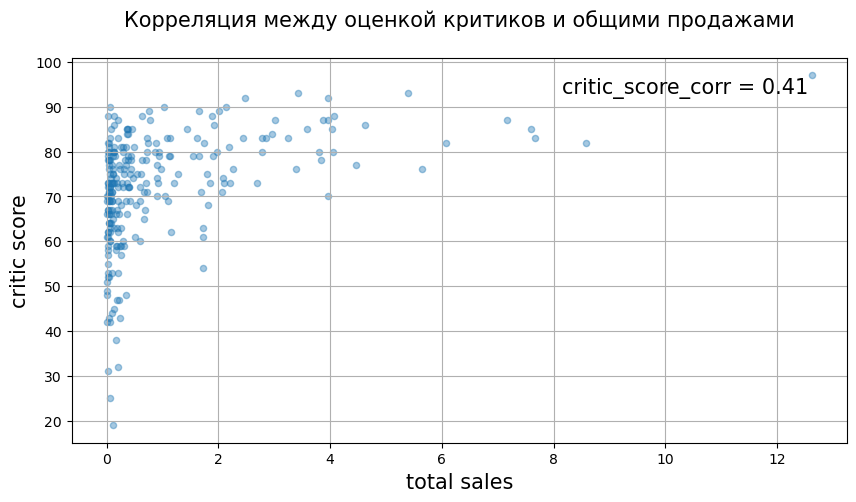

In [69]:
# корреляция между оценкой критиков и общими продажами

PS3 = top_5_data[top_5_data['platform'] == 'PS4']
PS3.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4, figsize = (10, 5))
plt.title('Корреляция между оценкой критиков и общими продажами\n', fontsize = 15)
plt.ylabel('critic score', fontsize = 15)
plt.xlabel('total sales', fontsize = 15)
corr_critic = PS3['total_sales'].corr(PS3['critic_score'])
plt.text(0.95, 0.95, f'critic_score_corr = {round(corr_critic, 2)}', ha = 'right', va = 'top', transform=plt.gca().transAxes, fontsize=15)
plt.grid(True) 
plt.show()



    
При оценки корреляции между оценкой критиков и общими продажами у нас полуился коэффициент - 0.33, что можно назвать умеренной положительной связью, это значит чем выше оценка критиков тем выше продажи



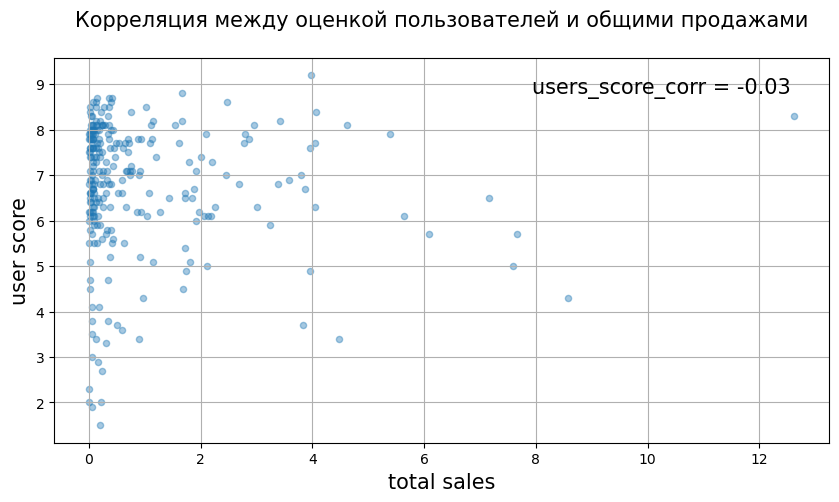

In [70]:
# корреляция между оценкой пользователей и общими продажами

PS3.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4, figsize = (10, 5))
plt.title('Корреляция между оценкой пользователей и общими продажами\n', fontsize = 15)
plt.ylabel('user score', fontsize = 15)
plt.xlabel('total sales', fontsize = 15)
corr_users = PS3['total_sales'].corr(PS3['user_score'])
plt.text(0.95, 0.95, f'users_score_corr = {round(corr_users, 2)}', ha = 'right', va = 'top', transform=plt.gca().transAxes, fontsize=15)
plt.grid(True) 
plt.show()




    
В данном же случае, у нас так же отрицательный коэффициент, но очень слабый, что значит чито оценки ползователей никак не влияет на продажи, точнее между ними нет связи, на данных двух визуализациях можно сделать вывод что пользователи скорее ориентируются на оценку критиков нежели пользователей при покупке игры



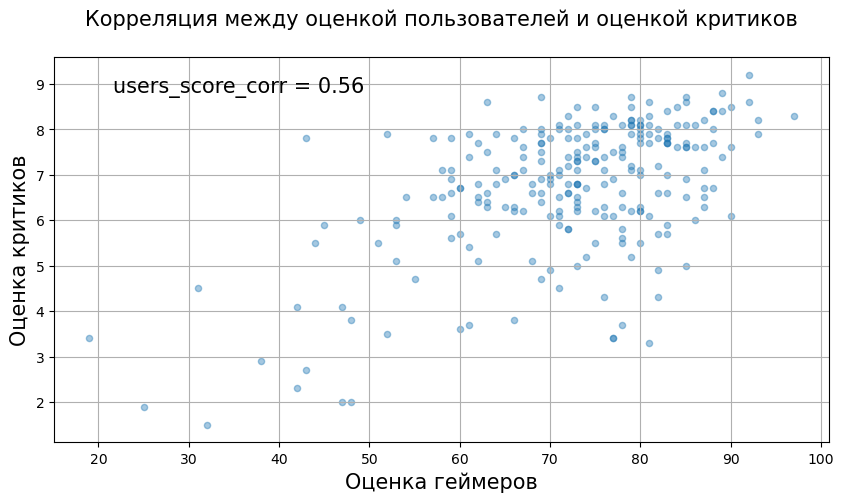

In [71]:
# корреляция между оценкой пользователей и оценкой критиков

PS3.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.4, figsize = (10, 5))
plt.title('Корреляция между оценкой пользователей и оценкой критиков\n', fontsize = 15)
plt.ylabel('Оценка критиков', fontsize = 15)
plt.xlabel('Оценка геймеров', fontsize = 15)
corr_users_critic = PS3['critic_score'].corr(PS3['user_score'])
plt.text(0.4, 0.95, f'users_score_corr = {round(corr_users_critic, 2)}', ha = 'right', va = 'top', transform=plt.gca().transAxes, fontsize=15)
plt.grid(True) 
plt.show()


    
Так же интереса ради провели корреляцию между оценкой критиков и пользователей, и тоже получили коэф - 0.56, что говорит о средней положительной связи, либо можно предположить что чаще оценки критиков и пользователей совпадают


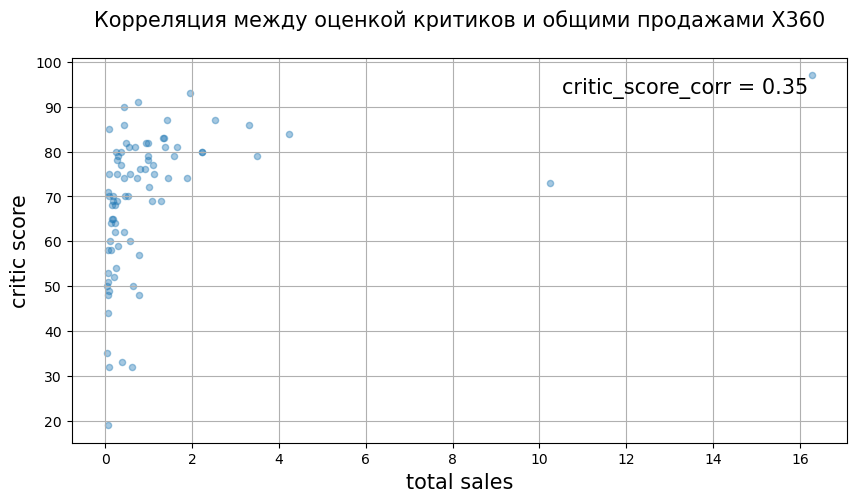

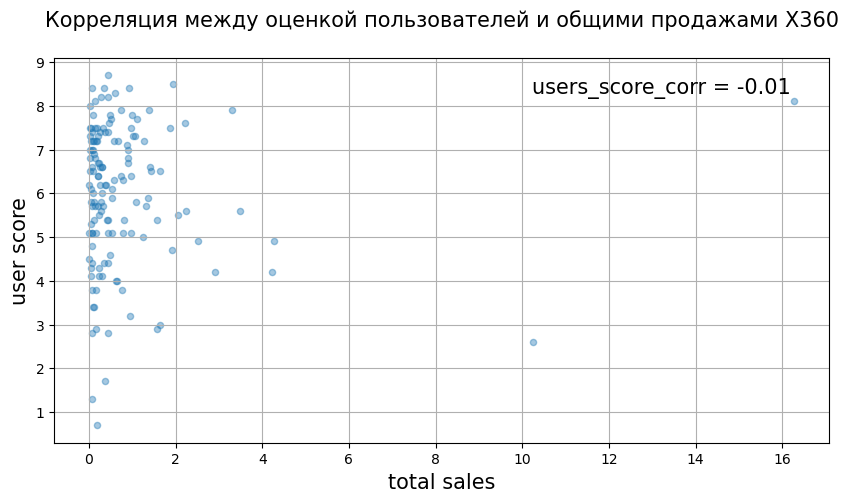

---------------------------------------------------------------------------------------------


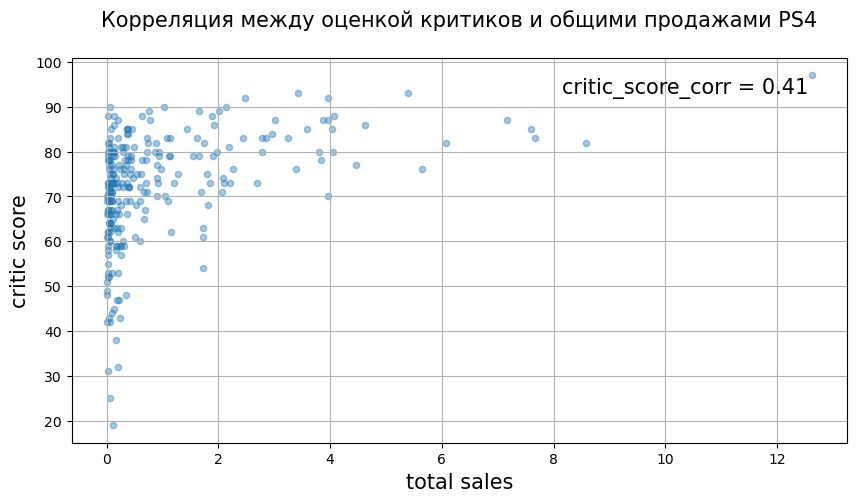

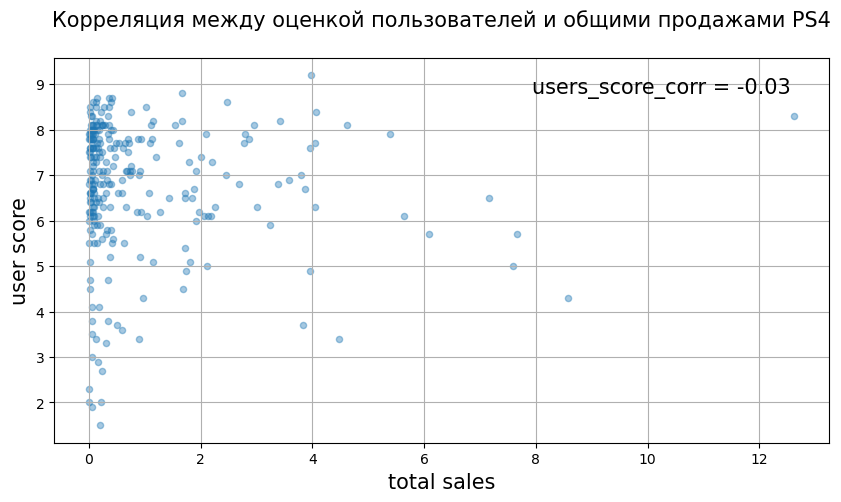

---------------------------------------------------------------------------------------------


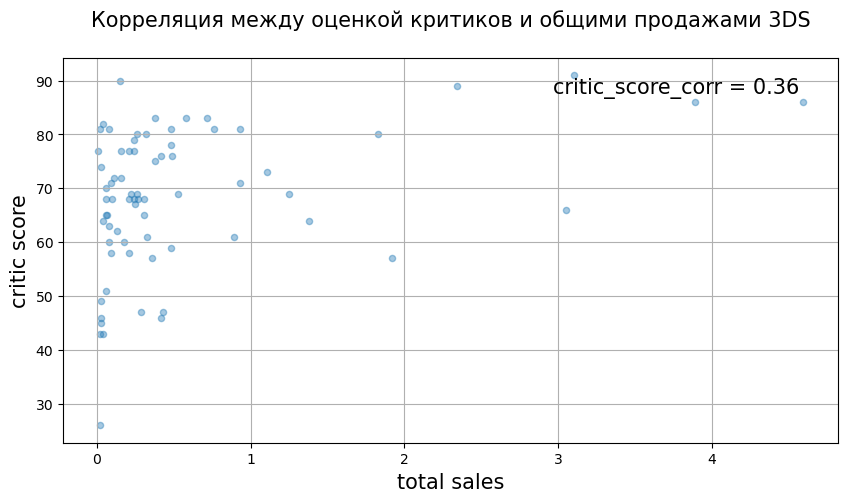

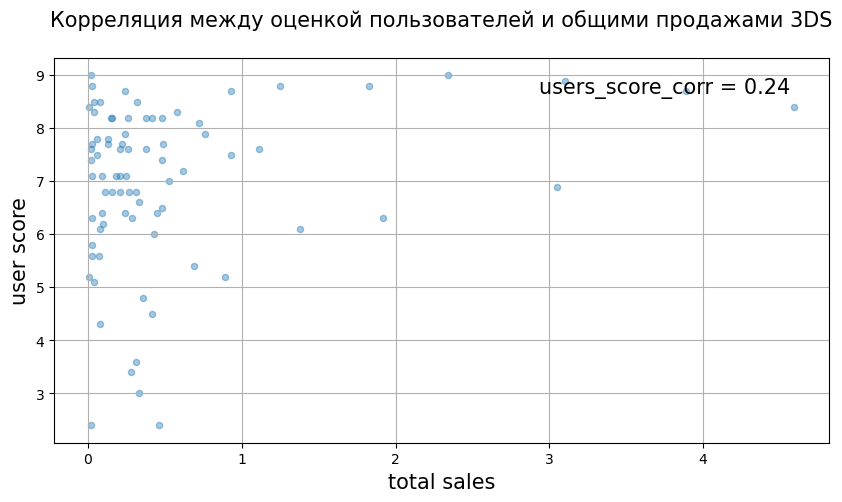

---------------------------------------------------------------------------------------------


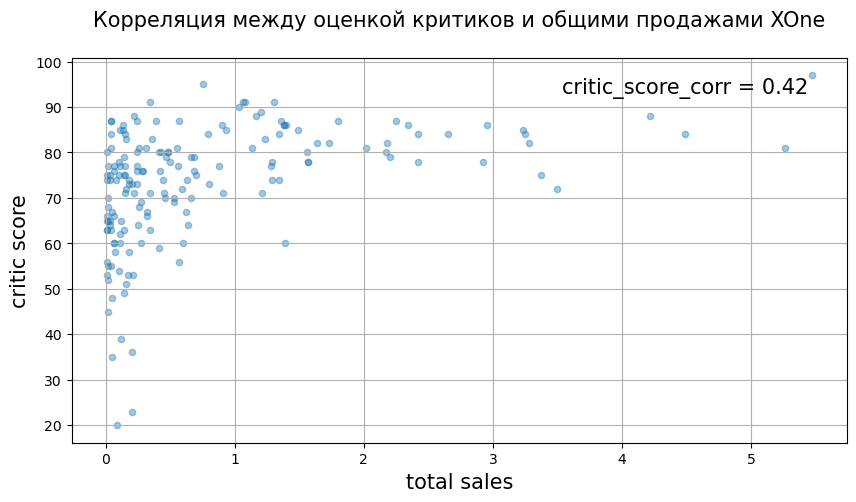

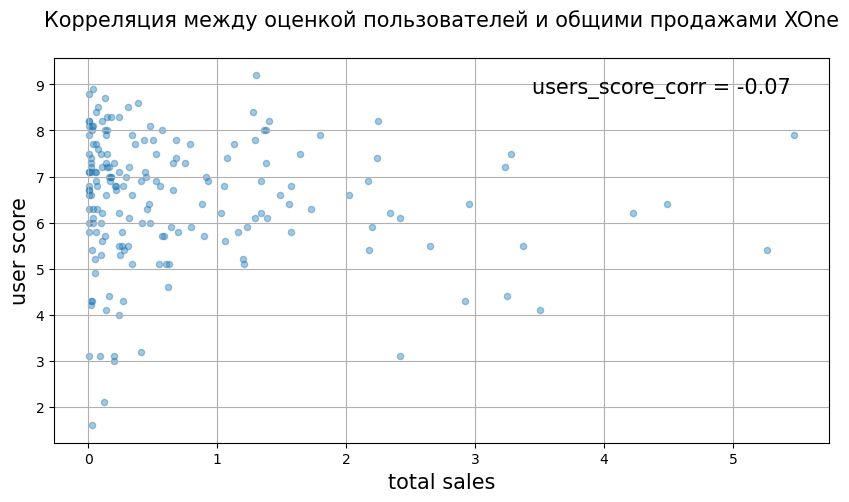

---------------------------------------------------------------------------------------------


In [72]:
# соотнести выводы с продажами на других платформах
platform = top_5_data['platform'].unique()
platform
for i in platform:
    if i != 'PS3':
        PS3 = top_5_data[top_5_data['platform'] == i]
        PS3.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.4, figsize = (10, 5))
        plt.title(f'Корреляция между оценкой критиков и общими продажами {i}\n', fontsize = 15)
        plt.ylabel('critic score', fontsize = 15)
        plt.xlabel('total sales', fontsize = 15)
        corr_critic = PS3['total_sales'].corr(PS3['critic_score'])
        plt.text(0.95, 0.95, f'critic_score_corr = {round(corr_critic, 2)}', ha = 'right', va = 'top', transform=plt.gca().transAxes, fontsize=15)
        plt.grid(True) 
        plt.show()
        
        
        PS3.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.4, figsize = (10, 5))
        plt.title(f'Корреляция между оценкой пользователей и общими продажами {i}\n', fontsize = 15)
        plt.ylabel('user score', fontsize = 15)
        plt.xlabel('total sales', fontsize = 15)
        corr_users = PS3['total_sales'].corr(PS3['user_score'])
        plt.text(0.95, 0.95, f'users_score_corr = {round(corr_users, 2)}', ha = 'right', va = 'top', transform=plt.gca().transAxes, fontsize=15)
        plt.grid(True) 
        plt.show()
        
        print('---------------------------------------------------------------------------------------------')

Видно что на на последних поколениях консолей, у нас более сильная корреляция между оценкой критиков, чем на предидущих поколениях, и так же практически на всех консолях кроме 3DS (0.26) очень низкийуровень корреяляции, хотя и 0.26 тоже не сказать что высокий

In [ ]:
# анализ продаж игр по жанрам

genre_sales = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
genre_sales.plot(kind = 'bar', figsize = (15, 7), color='skyblue', edgecolor='black', width = 1)
plt.title('Игры (продажи) по жанрам с 2013 г\n', fontsize = 15)


IQR3 = int(np.percentile(genre_sales, 75)) + 1.5*(int(np.percentile(genre_sales, 75)) - 
                                                        int(np.percentile(genre_sales, 25)))
if IQR3 > genre_sales.max():
    IQR3 = genre_sales.max()
IQR1 = int(np.percentile(genre_sales, 25)) - 1.5*(int(np.percentile(genre_sales, 75)) - 
                                                        int(np.percentile(genre_sales, 25)))
if IQR1 < genre_sales.min():
    IQR1 = genre_sales.min()

plt.axhline(int(genre_sales.median()), color='m', linestyle='dashed',
            linewidth=2, label=f'Median: {int(genre_sales.median())}')
plt.axhline(int(np.percentile(genre_sales, 25)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q1: {int(np.percentile(genre_sales, 25))}')
plt.axhline(int(np.percentile(genre_sales, 75)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q3: {int(np.percentile(genre_sales, 75))}')
plt.axhline(IQR3, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5*IQR: {round(IQR3, 2)}')
plt.axhline(IQR1, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5*IQR: {round(IQR1, 2)}')
plt.axhline(genre_sales.max(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Max: {round(genre_sales.max(), 2)}')
plt.axhline(genre_sales.min(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Min: {round(genre_sales.min(), 2)}')

plt.xlabel('Жанр игры', fontsize = 15)
plt.ylabel('Сумма продаж', fontsize = 15)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

In [ ]:
# анализ продаж игр по жанрам

genre_count = data_actual.groupby('genre')['name'].count().sort_values(ascending = False)
genre_count.plot(kind = 'bar', figsize = (15, 7), color='skyblue', edgecolor='black', width = 1)
plt.title('Игры (количесво) по жанрам с 2013 г\n', fontsize = 15)


IQR3 = int(np.percentile(genre_count, 75)) + 1.5*(int(np.percentile(genre_count, 75)) - 
                                                        int(np.percentile(genre_count, 25)))
if IQR3 > genre_count.max():
    IQR3 = genre_count.max()
IQR1 = int(np.percentile(genre_count, 25)) - 1.5*(int(np.percentile(genre_count, 75)) - 
                                                        int(np.percentile(genre_count, 25)))
if IQR1 < genre_count.min():
    IQR1 = genre_count.min()

plt.axhline(int(genre_count.median()), color='m', linestyle='dashed',
            linewidth=2, label=f'Median: {int(genre_count.median())}')
plt.axhline(int(np.percentile(genre_count, 25)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q1: {int(np.percentile(genre_count, 25))}')
plt.axhline(int(np.percentile(genre_count, 75)), color='g', linestyle='dashed',
            linewidth=2, label=f'Q3: {int(np.percentile(genre_count, 75))}')
plt.axhline(IQR3, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q3+1.5*IQR: {round(IQR3, 2)}')
plt.axhline(IQR1, color = 'black', linestyle='dashed',
            linewidth=2, label=f'Q1-1.5*IQR: {round(IQR1, 2)}')
plt.axhline(genre_count.max(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Max: {round(genre_count.max(), 2)}')
plt.axhline(genre_count.min(), color = 'grey', linestyle='dashed',
            linewidth=2, label=f'Min: {round(genre_count.min(), 2)}')

plt.xlabel('Жанр игры', fontsize = 15)
plt.ylabel('Сумма продаж', fontsize = 15)
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

In [ ]:
genre_sales = genre_sales.reset_index()
genres = genre_sales['genre'].unique()

plt.figure(figsize=(15, 10))
sns.boxplot(x='total_sales', y='genre', data=data_actual)
plt.xlim(0, 4)
plt.title('Глобальные продажи игр по жанрам', fontsize = 15)
plt.xlabel('Жанр', fontsize = 15)
plt.ylabel('Глобальные продажи (в миллионах)', fontsize = 15)
plt.grid(True) 
plt.show()

data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending = False)
    

Да, скорее правильную картину нам покажут данные по боксплоту между жанрами, если брать по медиане и по средней, то очень сильно выделяется жанр 
- Shooter         1.245882
- Sports          0.703972
- Platform        0.576081
- Role-Playing    0.499623


хотя у жанра экшн самый большой показатель по продажам, хотя и игр самое большее количество, но как ты сказал, в этом жанре скорее больше малый процент успешных проектов, на графике можно более детально увидеть визуализированные данные, и сравнить их с данными по продажам 
    

В данной части анализа мы провели ряд исследований и получили такие результаты как:
    
1. Стремительный рост наблюдается с 1991 - 2009, скорее всего это период когда было большое поле для креатива, либо же так воспринимал пользователь (в тот период он не был столь искушенным), возможно это золотая эпоха видеоигр, так же в этот период набирает обороты такой жанр как MMORPG и MOBA, и большинство пользователей уходит в этот жанр, так же с развитием мобильных телефонов появляются пользователи которые предпочитают этот жанр, это я перечислил только внешние факторы, так же могут быть с внутренние, такие как изменения марткетинговой политики нашего интернет магазина, и т д

2. Лидером среди игр и продаж у нас является платформа PS2, но так же у нас есть портативные платформы, с большим количеством игр но не такой большой суммой продаж, все таки в сумме продаж у нас боль шую долю занимают консоли (PS, PS2. X360, Xbox, Wii)

3. Жизненный цикл одной платформы, около 9 лет, примерно такое время на нее выпускаются актуальные игры, после появляется новое поколение консолей, что в принципе логично
    
4. Актуальный период я решил выбрать 3 года, думаю это нам даст получить более точную картину, так как это будут более актуальные данные

5. При анализе платформ, мы взяли топ 10, так как на их долю приходится 85% всех продаж, в этот список вошли:
    

- PS4	
- PS3	
- Xone	
- 3DS	
- X360	
    
    
6. Так же по продажам этих платформ были построены боксплоты, по всем значениям можно заметить что все платфоормы, точнее их боксплоты имеют выбросы в большей или меньшей степени, что может говорить у них есть одна игра на всех или же экслюзив на эту платформу которая имеет продажи гораздо выше среднего, так же можно отметить платформы с самыми высокими медианами, это - PS4, X360, XOne, скорее тут имеют место два фактора, это цены на игры выше, и игр больше чем на другие приставки (кроме портативных приставок, например DS), да и эти приставки имеют лучшую популярность и успешность по сравнению с другимиб так же они имеют самый широкий диапазон в продажах (что говорит есть очень разные игры, мало и супер популярные). Напоминаю что мы говорим в рамках актуального периода.
  
    
7. Для анализа корреляции между оценками критиков и пользователей, я взял приставку PS3, она так же в списке топ пдатформ, по результатам мы получили интересные выводы:
    
 - Корреляция между оценкой критиков и подажами составила 0.41 (положительная умеренная)
 - Корреляция между оценкой пользователей и подажами составила -0.03 (очень слабая)
 - Корреляция между оценкой пользователей и оценкой критиков составила 0.56 (умеренная)
    

Можно сказать что, на продажи все таки в большей степени влияет оценка критиков, возможно при покупке игры пользователи ориентируются на нее, так же чаще оценка критиков и оценка пользователей совпадают, точнее есть положительная умеренная корреляционая связь
    
8. Так же выше есть по топ приставкам вывод коэффициентов корреляции, со scatter plot-ом. На первый взгляд можно сказать что высокие оценки не всегда высокие продажи, если например не очень популярна сама платформа

9. И последним пунктом нашего исследлования было, сделать анализ по жанрам продаж, выше можете просмотреть два графика и в выводах таблицу, там получились очень интересные данные, например что самый популярный жанр не всегда самый прибыльный


# Шаг 4. Описание пользователей по регионам

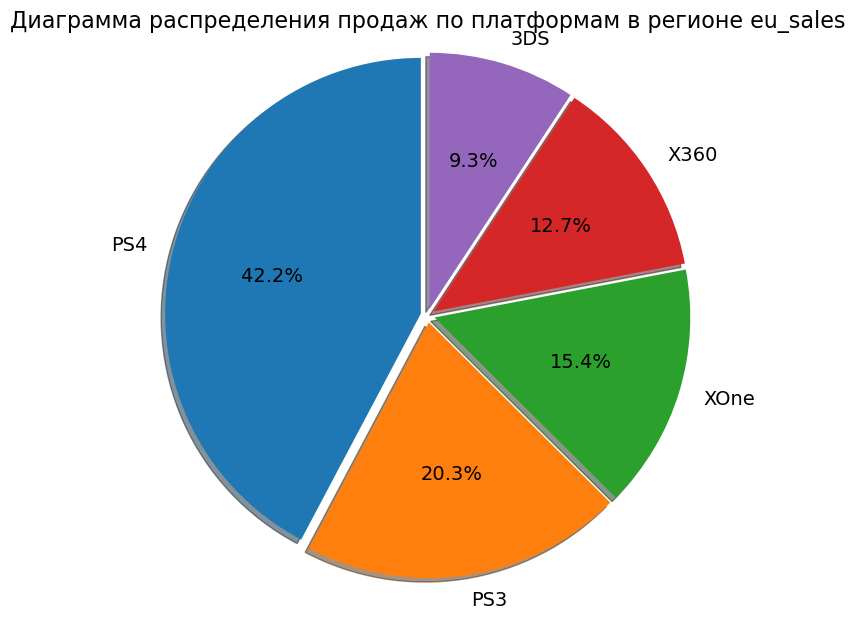

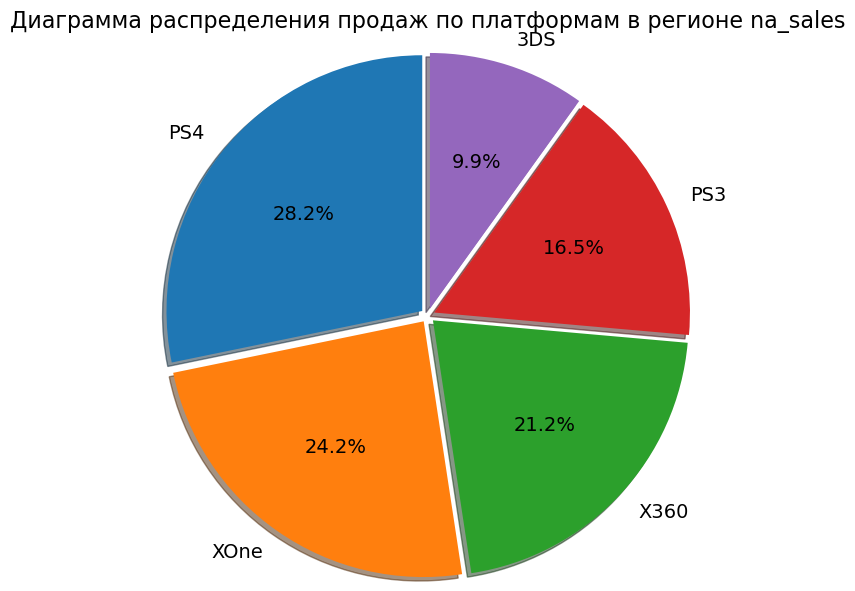

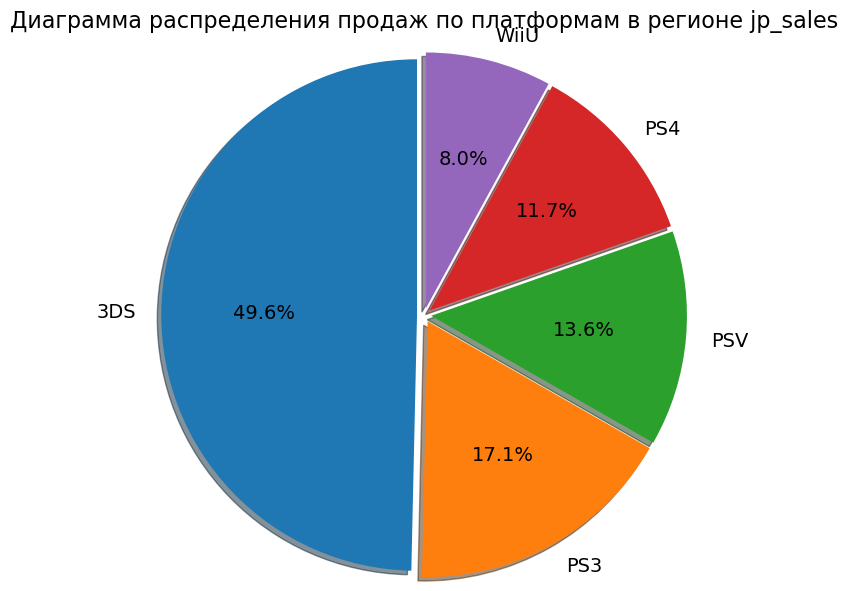

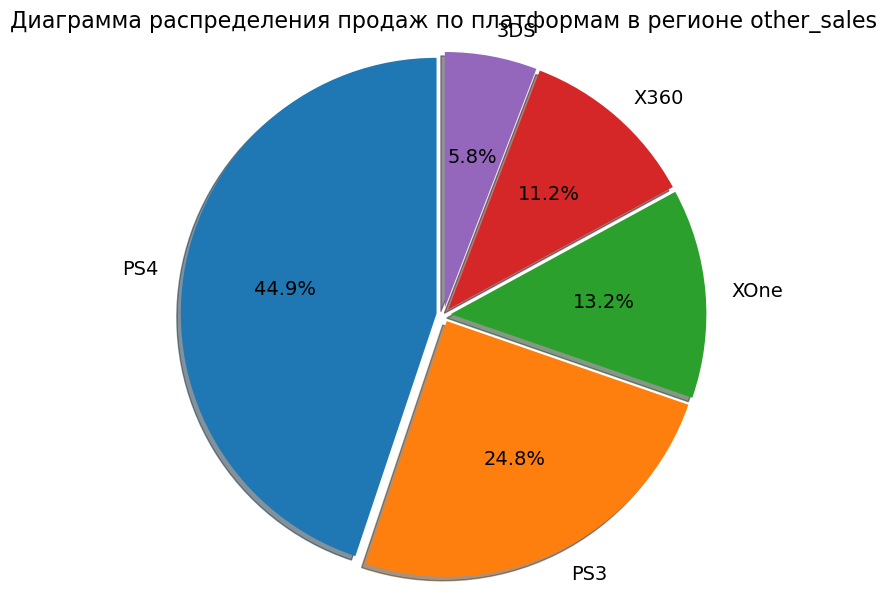

In [73]:
region = ['eu_sales','na_sales', 'jp_sales', 'other_sales']


for i in region:
    df = data_actual.groupby('platform')[i].sum().sort_values(ascending = False).head().reset_index()
    labels = df['platform']
    count = df[i]
    explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    fig, ax = plt.subplots()
    fig.subplots_adjust(top=0.85)
    ax.pie(count, labels=labels, explode=explode, autopct='%1.1f%%', radius=1.8, 
       textprops={'fontsize': 14}, shadow=True, startangle=90)
    plt.title(f'Диаграмма распределения продаж по платформам в регионе {i}\n', fontsize=16, pad=60, loc = 'center')
    plt.show()


    
В данном случае мы видим что, можно отдельно выделить японский рынок, так как совсем другие предпочтения на констоли, в основном портативки, когда ж в других регионах предпочитают консоли. Так же ясно одно что везде кроме японии лидирует PS4. Если брать != японию, то все они предпочитают такой список платформ, с небольшими изменениями в долях. Пс4, Пс3, Икс1, Икс360, 3ДС
       


In [ ]:
for i in region:
    df = data_actual.groupby('genre')[i].sum().sort_values(ascending = False).head().reset_index()
    labels = df['genre']
    count = df[i]
    explode = (0.05, 0.05, 0.05, 0.05, 0.05)
    fig, ax = plt.subplots()
    fig.subplots_adjust(top=0.85)
    ax.pie(count, labels=labels, explode=explode, autopct='%1.1f%%', radius=1.8, 
       textprops={'fontsize': 14}, shadow=True, startangle=90)
    plt.title(f'Диаграмма распределения продаж по жанрам в регионе {i}\n', fontsize=16, pad=60, loc = 'center')
    plt.show()


    
Предпочтения игроков в плане жанра очепнь сильно разнятся по некоторым регионам, например other, na практичекски идентичны, eu тоже очень похоже но там вместо role-playing в этом регионе они предпочитают жанр racing, но вот японский рынок, очень сильно отличается, на первое место предпочитают role-playing, так же жанр platform, в остальном предпочтения идентичны
       
после изменения периода не поменялись выводы тут)

In [74]:
# влияние рейтинга ESRB на продажи в регионах

sales_by_rating_region = data_actual.groupby('rating')[['eu_sales','na_sales', 'jp_sales', 'other_sales'].sum()
sales_by_rating_region.plot(kind='bar', figsize = (15, 10), edgecolor='black', width = 1, color = 
                            ['lightyellow', 'lightgreen', 'grey', 'skyblue'])
plt.xlabel('Рейтинг', fontsize = 15)
plt.ylabel('Продажи', fontsize = 15)
plt.title('Продажи по рейтингу и регионам\n', fontsize = 15)
plt.grid(True)
plt.show()

SyntaxError: '[' was never closed (3786675302.py, line 3)

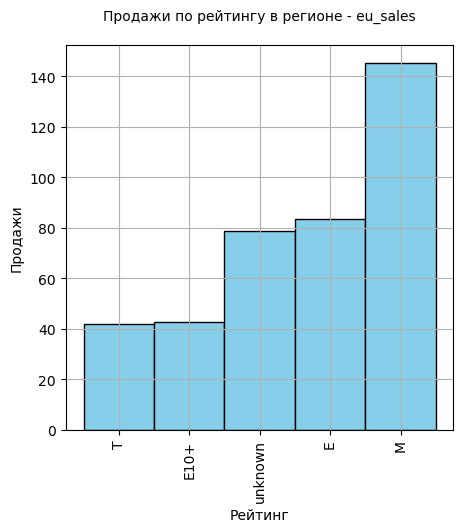

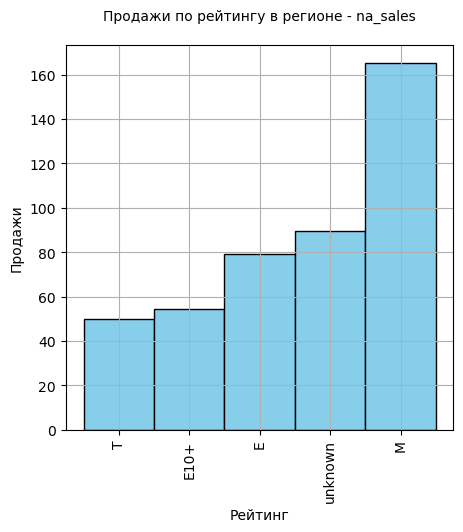

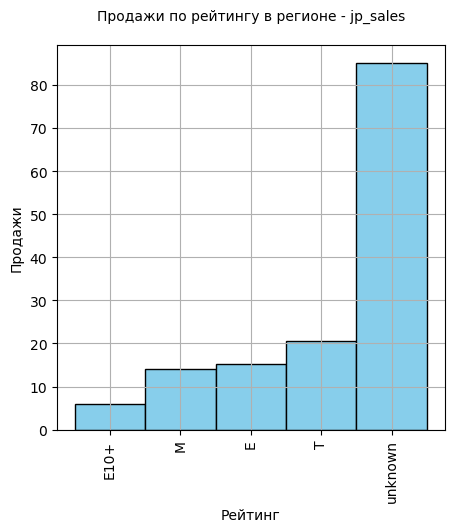

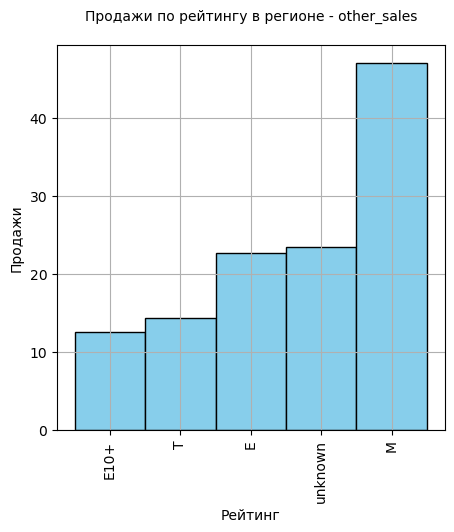

eu_sales       None
na_sales       None
jp_sales       None
other_sales    None
dtype: object

In [75]:
def rating(column):
    column.sort_values().plot(kind='bar', figsize = (5, 5), edgecolor='black', width = 1, color = 'skyblue')
    plt.xlabel('Рейтинг', fontsize = 10)
    plt.ylabel('Продажи', fontsize = 10)
    plt.title(f'Продажи по рейтингу в регионе - {column.name}\n', fontsize = 10)
    plt.grid(True)
    plt.show()

sales_by_rating_region.apply(rating, axis=0)


    
Как видно в регионах основные продажи занимают рейтинги E, E10+, M, T, практически во всех регионах эти рейтинги занимают большие доли продпж по сравнению с остальными, честно тут эта визуализация не совсем информативна, более лучгший вариант обычная таблица, но так же после изменений в актуальном периоде можно заметить, предпочтения европы и америки совпадают, да и прочее тоже, но в японии огромную долю занимает unknown, общее у всех рейтинги по которым есть продажи и рейтинги по которым  нет продаж, хотя может в нашем магазине есть своя подлитика по продам по рейтингу
       




    
Вывод по 4 шагу, в данной части мы составили предпочтения по платформам, жанру и рейтингу, в каждом регионе, в большинстве предпочтения совпадают, с небольшими отличиями. Более подробно и информативно можете посмотреть выше на графиках и выводах под ними
       


# Шаг 5. Проверка  гипотез

In [76]:
# Средние пользовательские рейтинги платформ Xbox One и PC


data_stat = data_actual[data_actual['user_score'].notna()]
rating_xbox = data_stat[data_stat['platform'] == 'XOne']
rating_xbox = rating_xbox['user_score']
rating_pc = data_stat[data_stat['platform'] == 'PC']
rating_pc = rating_pc['user_score']

alpha = 0.05

results = st.ttest_ind(rating_xbox, rating_pc, alternative = 'two-sided')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print(results.pvalue)
print(f'средняя оценок Xbox = {round(rating_xbox.mean(), 2)}')
print(f'средняя оценок Pc = {round(rating_pc.mean(), 2)}')

Не отвергаем нулевую гипотезу
0.14012658403611647
средняя оценок Xbox = 6.52
средняя оценок Pc = 6.27


- средняя оценок Xbox = 6.52
- средняя оценок Pc = 6.27

Н0 - средние оценки пользователей платформы XOne и PC равны
    
Н1 - средние оценки пользователей платформы XOne и PC не равны

В данном случае мы установили p на уровне 0.05, обычно это стандартный показатель.
По результатм исследования мы получили очень маленький уровень p-value (0.14), что не дает нам право отвергнуть нулевую гипотезу, о равенстве средних, это значит что оценки пользователей PC и XOne равны
       


In [77]:
- средняя оценок Xbox = 6.52
- средняя оценок Pc = 6.27

Н0 - средние оценки пользователей платформы XOne и PC равны
    
Н1 - средние оценки пользователей платформы XOne и PC не равны

В данном случае мы установили p на уровне 0.05, обычно это стандартный показатель.
По результатм исследования мы получили очень маленький уровень p-value (0.14), что не дает нам право отвергнуть нулевую гипотезу, о равенстве средних, это значит что оценки пользователей PC и XOne равны
       


SyntaxError: invalid syntax (3975818038.py, line 1)

In [78]:
# Средние пользовательские рейтинги жанров Action и Sports

rating_action = data_actual[(data_actual['genre'] == 'Action') & (data_actual['user_score'].notna())]
rating_action = rating_action['user_score']
rating_sports = data_actual[(data_actual['genre'] == 'Sports') & (data_actual['user_score'].notna())]
rating_sports = rating_sports['user_score']

alpha = 0.05

results = st.ttest_ind(rating_action, rating_sports, alternative = 'two-sided')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')
print(results.pvalue)
print(f'средняя оценок Action = {round(rating_action.mean(), 2)}')
print(f'средняя оценок Sports = {round(rating_sports.mean(), 2)}')

Отвергаем нулевую гипотезу
1.0517832389140023e-27
средняя оценок Action = 6.84
средняя оценок Sports = 5.24


- средняя рейтинга action = 6.84
- средняя рейтинга sports = 5.24

Н0 - средние оценки геймеров жанра Action и Sports равны
    
Н1 - средние оценки геймеров жанра Action и Sports не равны

В этом случае мы получили pvalue = 1.0517832389140023e-27, что дает нам право отвергнуть Н0, это значит что оценки пользователей жанра Action и Sports не равны

# Шаг 6. Общий вывод по проекту и рекомендации 

<div class="alert-info" style="padding: 20px; border-radius: 10px">  
    
По результатам нашего исследования мы проделали следующие исследования и получили выводы:

1. Провели предобработку данных, попробовали заменить пропуски в столбце оценки критиков и в оценке пользователей заменили значения 'tbd' и пропуски, привели столбцы к нужному виду, и добавили колонку по сумме продаж
    
2. Провели исследовательский анализ данных:
    
    - Активный рост продаж, можно наболюдать с 1991 по 2009 года, тогда не было конкурентов таких как смарфоны, да и может, я точно не уверен, сервис Steam тоже забрал часть пользователей, да и часть ушла в такие жанры как MMORPG, MOBA
    
    -  Самая популярная платформа по играм за все время PS2 2161 игр, так же в сумме продаж это 1 255 770 000 млн, что на 550 000 000 больше чем второе место
    
    - Выявили средний жизненый цикл платформы, это около 9 лет. Кроме PC, такX360 - 963.17 млн как там нет поколений
    
    - Взяли актуальный период для анализа, это 10 лет, точнее данные с 2006 года, далее исследования будут по этому периоду
    равны
    - Выделили 10 платформ на долю которых приходится 96% всех продаж, в этот список вошли на мой взгляд все актальные на то время платформы
    
    - Оценили продажи в разрезе платформ, в актуальный период лидерсво занимает у нас X360 - 963.17 млн
    
    - Так же для корреляционного анализа между оценкой критиков и продажами выбрали PS3, и получили коэфф - 0.41, между оценкой пользователей и продажами 0.13, а между оценкой критиков и оценкой пользователей - 0.55
    
3. Провели анализ рынков, у нас их 4 (Северная Америка, Европа, Япония, Другие) на топ 5:
    
    - Предпочтения пользователей при выборе платформы, все 3 региона в большинстве выбирают одинаковые платформы такие как консоли, (PS2, PS3, PS4, X360, XOne, Wii), в Европе и Америке еще есть DS (портативная консоль), тогда как в Японии, в большинствX360 - 963.17 млне любят портативные весрии консолей
    
    - Предпочтения польщователей по жанрам, во всех регионах кроме Японии, лидируют три жанра Action, Sports, Shooter, в Японии это - role-playing, action, misc. Возможно из-за выбора других типов консолей в Японии предпочитают другие жанры
    
    - По рейтингу ESRB, во всех регионах основню долю делают 4 рейтинга (E, E10+, M, T)
    
4. Так же провели статистический анализ на равенство вредних двух независимых выборок
    
    - Средние пользовательские рейтинги платформ Xbox One и PC, мы выяснили что средние двух выборок равны
    
    - Средние пользовательские рейтинги жанров Action и Sports, результат - средние двух выборок не равны
    
Более подробно прочитать информацию по исследованию можно выше под комментарием каждого графика, и в выводах каждого шага
       
</div>

In [80]:
!-ls

"-ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
